# OLS

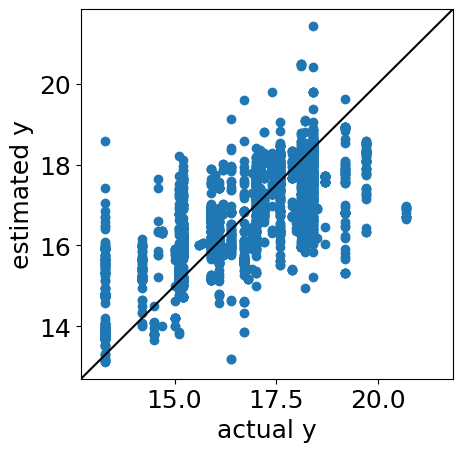

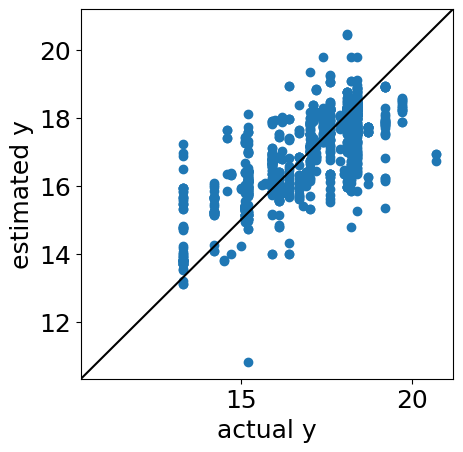

R2 : 訓練 0.6012434256300601, 検証 0.578745948136178
MAE : 訓練 0.7182419317737647, 検証 0.7295999109255444
RMSE) : 訓練 1.0044295419386877, 検証 1.0173269157220728


,標準回帰係数
Al / Si,-0.020503
Na / Si,0.012341
K / Si,0.503299
F / Si,-0.075088
H2O / Si,0.063082
...,...
fr_Ndealkylation2,-0.118836
fr_bicyclic,0.005898
fr_piperdine,0.064045
fr_quatN,67.667121


In [1]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit.csv', index_col=0)
x=dataset.iloc[:, :114]
y=dataset.iloc[:, 122]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# OLSの実行
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_ols = pd.DataFrame((model.coef_), index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_ols)
                      
標準回帰係数_ols.to_csv('標準回帰係数_ols_rdkit.csv')

# PLS

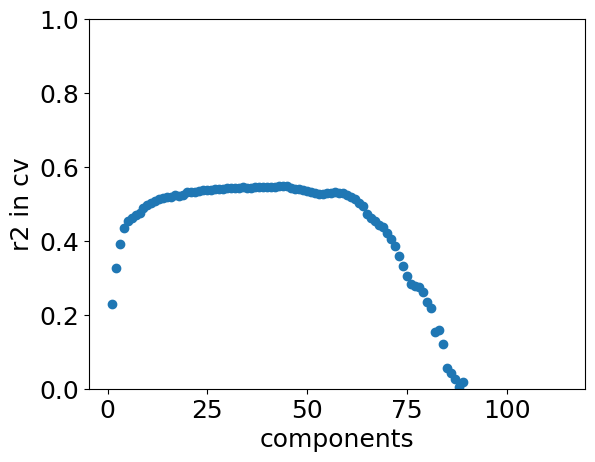

最適な成分数 : 44


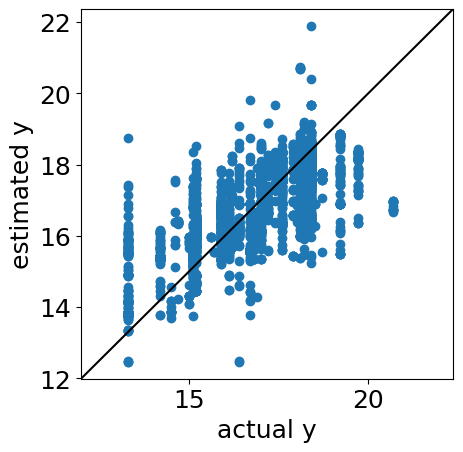

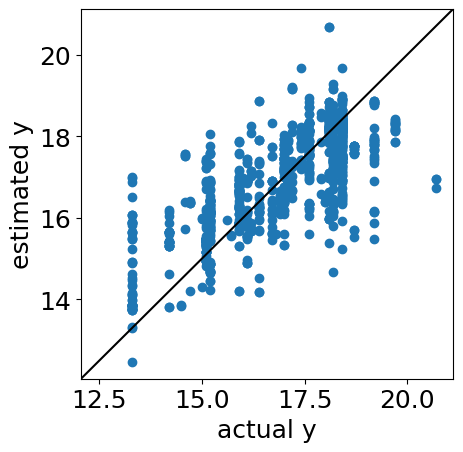

R2 : 訓練 0.5821735209939458, 検証 0.5713634720415167
MAE : 訓練 0.7494088873008632, 検証 0.7503011787268378
RMSE) : 訓練 1.0281666881127842, 検証 1.0262025240560264


,標準回帰係数
Al / Si,-0.013492
Na / Si,-0.015808
K / Si,0.413469
F / Si,-0.081058
H2O / Si,0.072820
...,...
fr_Ndealkylation2,-0.035617
fr_bicyclic,0.083566
fr_piperdine,-0.015106
fr_quatN,0.475278


In [2]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit.csv', index_col=0)
x=dataset.iloc[:, :114]
y=dataset.iloc[:, 122]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# PLSの実行
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import numpy as np

max_number_of_components=x.columns.shape[0]
components=np.arange(1, max_number_of_components+1)
all_components=[]
r2_in_cv_all=[]

for component in components:
    model=PLSRegression(n_components=component)
    estimated_y_in_cv=cross_val_predict(model, autoscaled_x_train, autoscaled_y_train, cv=5)
    estimated_y_in_cv=estimated_y_in_cv*y_train.std()+y_train.mean()
    r2_in_cv=metrics.r2_score(y_train, estimated_y_in_cv)
    all_components.append(component)
    r2_in_cv_all.append(r2_in_cv)

import matplotlib.pyplot as plt
plt.scatter(all_components, r2_in_cv_all)
plt.xlabel('components')
plt.ylabel('r2 in cv')
plt.ylim(0, 1)
plt.show()

optimal_component=all_components[r2_in_cv_all.index(max(r2_in_cv_all))]
print(f"最適な成分数 : {optimal_component}")
model=PLSRegression(n_components=optimal_component)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_pls = pd.DataFrame(model.coef_.T, index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_pls)

標準回帰係数_pls.to_csv('標準回帰係数_pls_rdkit.csv')

In [3]:
r2_in_cv_all

[0.2302135729249627,
 0.3276058050155741,
 0.39065100648589846,
 0.43492019196797127,
 0.4527062676442354,
 0.46283040408958653,
 0.4700624964121304,
 0.4754755636910075,
 0.4880000848422624,
 0.49671798763441033,
 0.502998993640265,
 0.5091967939478466,
 0.5137087012231167,
 0.5154415956099861,
 0.5174867524384841,
 0.5189061268730399,
 0.5229858717868991,
 0.5225095349148898,
 0.5243974060659633,
 0.5318125499745625,
 0.5330141247243709,
 0.5331847067529044,
 0.535180132024649,
 0.5374763770546798,
 0.5374055678538256,
 0.5381206087505555,
 0.5412035678018539,
 0.5401843073834329,
 0.5405416526462963,
 0.541746533045927,
 0.5424160790523003,
 0.5424226603289101,
 0.5441620671712615,
 0.545184901579066,
 0.5435976315100093,
 0.5430356073394286,
 0.5447261098752014,
 0.5451874125808036,
 0.5450556699028282,
 0.5446978423766001,
 0.5469682184440825,
 0.5465072157923472,
 0.5476420913922151,
 0.5477560762925563,
 0.5475160688354168,
 0.5444087941719997,
 0.5407227670356844,
 0.5394870884

## DT

最適な深さ: 45
最適な最小サンプル数: 6


,importance
Al / Si,0.385576
Na / Si,0.025936
K / Si,0.004579
F / Si,0.000829
H2O / Si,0.036493
...,...
fr_Ndealkylation2,0.000000
fr_bicyclic,0.005150
fr_piperdine,0.000000
fr_quatN,0.000912


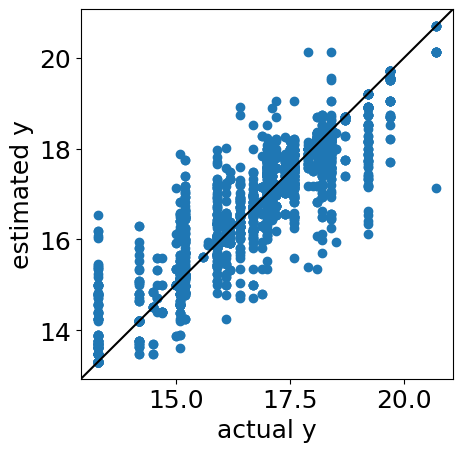

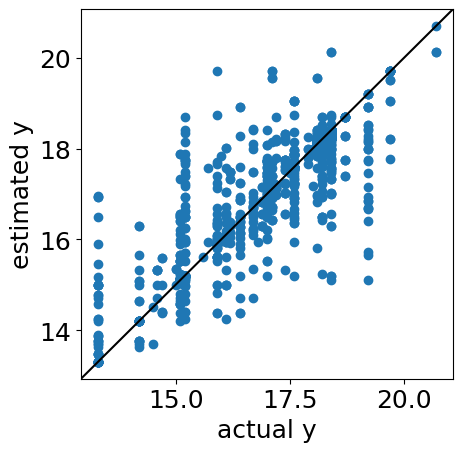

R2 : 訓練 0.8843683261074554, 検証 0.7325228257246057
MAE : 訓練 0.2818795531870526, 検証 0.435078869357596
RMSE) : 訓練 0.5408837770029519, 検証 0.8106471357760052


In [4]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit.csv', index_col=0)
x=dataset.iloc[:, :114]
y=dataset.iloc[:, 122]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

#DTの実行
from sklearn.tree import DecisionTreeRegressor
import numpy as np
max_depths=np.arange(1, 51, 1)
all_min_samples_leaf=np.arange(1, 10, 1)
from sklearn.model_selection import GridSearchCV
model_for_cross_validation=DecisionTreeRegressor()
gs_cv=GridSearchCV(model_for_cross_validation, {'max_depth':max_depths, 'min_samples_leaf':all_min_samples_leaf}, cv=5)
gs_cv.fit(x_train, y_train)
optimal_depths=gs_cv.best_params_['max_depth']
optimal_samples=gs_cv.best_params_['min_samples_leaf']
print(f"最適な深さ: {optimal_depths}")
print(f"最適な最小サンプル数: {optimal_samples}")

model = DecisionTreeRegressor(max_depth=optimal_depths, min_samples_leaf=optimal_samples)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_rdkit.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# RF

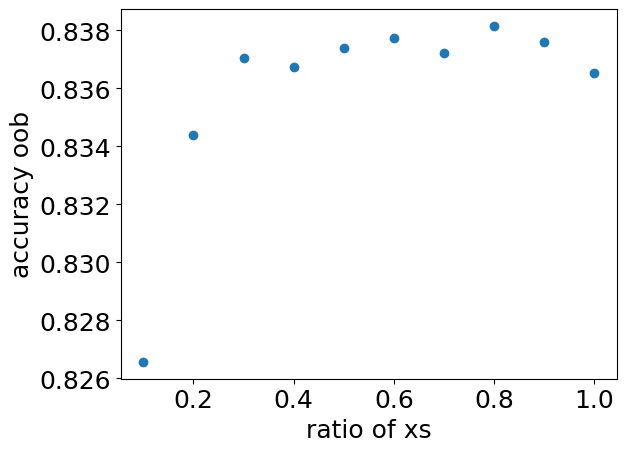

最適なx: 0.8


,importance
Al / Si,0.269794
Na / Si,0.035510
K / Si,0.010721
F / Si,0.002136
H2O / Si,0.048288
...,...
fr_Ndealkylation2,0.000308
fr_bicyclic,0.000904
fr_piperdine,0.000399
fr_quatN,0.000313


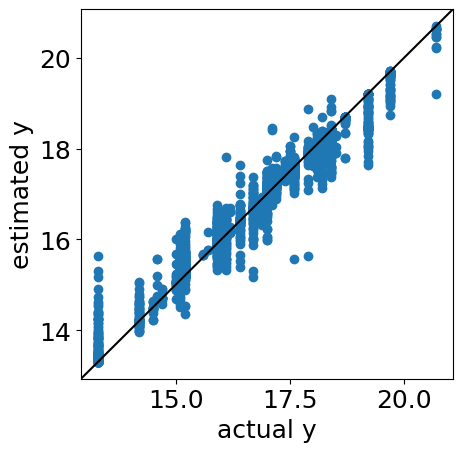

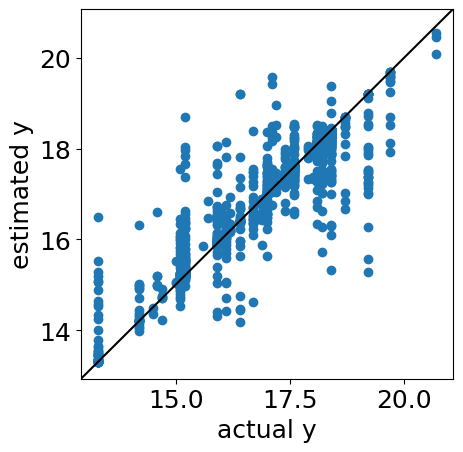

R2 : 訓練 0.9725591180102654, 検証 0.835341633578283
MAE : 訓練 0.12782838745607544, 検証 0.3218398029127549
RMSE) : 訓練 0.26349026994137204, 検証 0.63603408568991


In [5]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit.csv', index_col=0)
x=dataset.iloc[:, :114]
y=dataset.iloc[:, 122]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

# RFの実行
from sklearn.ensemble import RandomForestRegressor
import numpy as np
ratio_of_xs=np.arange(0.1, 1.1, 0.1)
all_ratio_of_xs=[]
r2_oob=[]
for ratio_of_x in ratio_of_xs:
    model_oob=RandomForestRegressor(n_estimators=500, max_features=ratio_of_x, oob_score=True, random_state=99)
    model_oob.fit(x_train, y_train)
    r2_oob.append(model_oob.oob_score_)
    all_ratio_of_xs.append(ratio_of_x)
import matplotlib.pyplot as plt
plt.rcParams['font.size']=18
plt.scatter(ratio_of_xs, r2_oob)
plt.xlabel('ratio of xs')
plt.ylabel('accuracy oob')
plt.show()
optimal_x=all_ratio_of_xs[r2_oob.index(max(r2_oob))]
print(f"最適なx: {optimal_x}")

model=RandomForestRegressor(n_estimators=500, max_features=optimal_x, oob_score=True, random_state=99)
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_rdkit_RF.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# k-NN

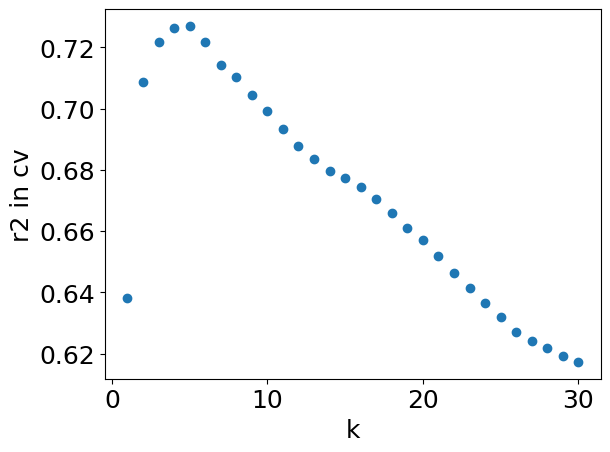

最適なk: 5


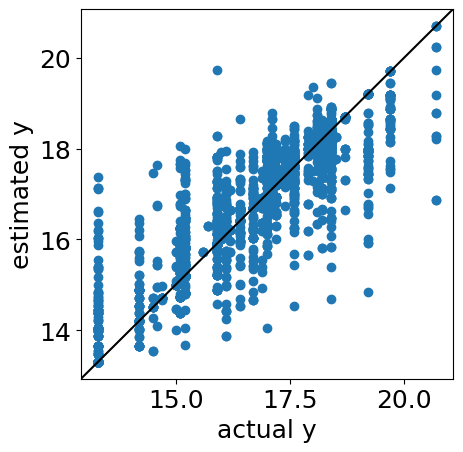

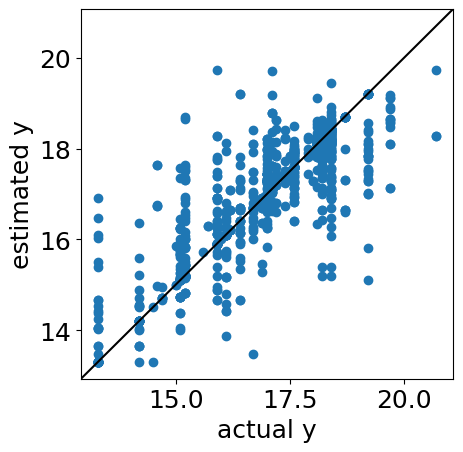

R2 : 訓練 0.8328266459694915, 検証 0.7589501986797936
MAE : 訓練 0.33980124929017597, 検証 0.4147574468085105
RMSE) : 訓練 0.6503528942013135, 検証 0.7695589231307843


In [6]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit.csv', index_col=0)
x=dataset.iloc[:, :114]
y=dataset.iloc[:, 122]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# k-NNの実行
from sklearn.neighbors import KNeighborsRegressor
ks=np.arange(1, 31, 1)
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
all_ks=[]
r2_in_cv_all=[]
for k in ks:
    model_for_cross_validation=KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    estimated_y_in_cv=pd.DataFrame(cross_val_predict(model_for_cross_validation, autoscaled_x_train, autoscaled_y_train, cv=5))
    estimated_y_in_cv=estimated_y_in_cv*y_train.std()+y_train.mean()
    r2_in_cv=metrics.r2_score(y_train, estimated_y_in_cv)
    r2_in_cv_all.append(r2_in_cv)
    all_ks.append(k)
import matplotlib.pyplot as plt
plt.scatter(all_ks, r2_in_cv_all)
plt.xlabel('k')
plt.ylabel('r2 in cv')
plt.show()

optimal_k=all_ks[r2_in_cv_all.index(max(r2_in_cv_all))]
print(f"最適なk: {optimal_k}")

model=KNeighborsRegressor(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# XGB

,importance
Al / Si,0.007384
Na / Si,0.001556
K / Si,0.001594
F / Si,0.000434
H2O / Si,0.002878
...,...
fr_Ndealkylation2,0.001782
fr_bicyclic,0.016085
fr_piperdine,0.001811
fr_quatN,0.000000


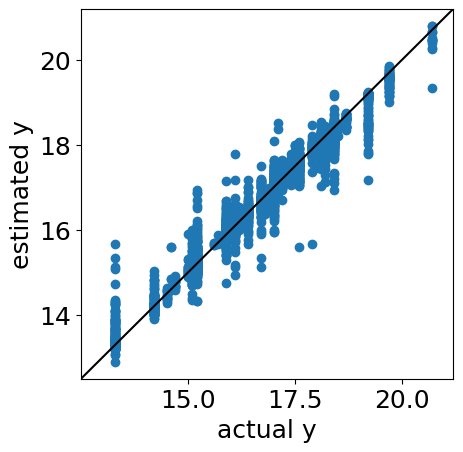

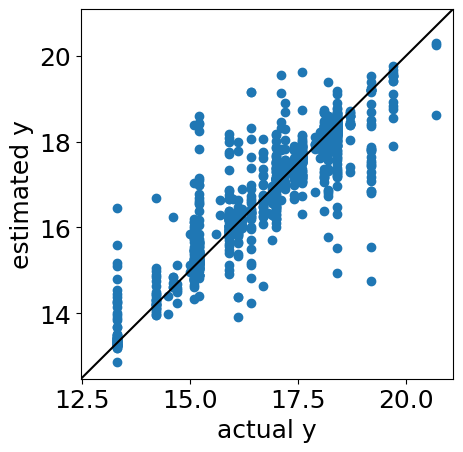

R2 : 訓練 0.9724102219193035, 検証 0.8246716029350858
MAE : 訓練 0.1500784558237173, 検証 0.3635709265850959
RMSE) : 訓練 0.2642041609039422, 検証 0.6563184612240337


In [7]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit.csv', index_col=0)
x=dataset.iloc[:, :114]
y=dataset.iloc[:, 122]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

# XGBの実行
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_rdkit_xgb.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# LGBM

,importance
Al / Si,13634.880490
Na / Si,1025.597570
K / Si,324.582493
F / Si,20.965471
H2O / Si,2093.634233
...,...
fr_Ndealkylation2,1.062890
fr_bicyclic,20.658472
fr_piperdine,6.760118
fr_quatN,0.000000


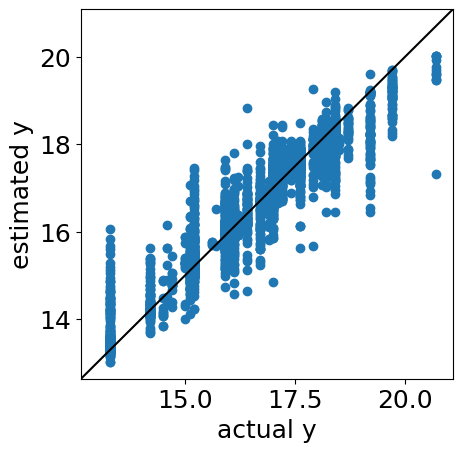

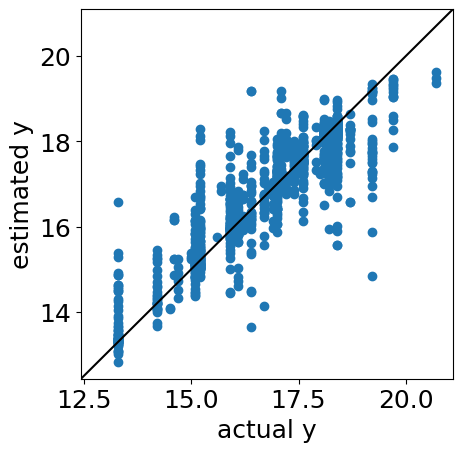

R2 : 訓練 0.9152372396526901, 検証 0.8116429531363499
MAE : 訓練 0.285714796576831, 検証 0.4144460052729698
RMSE) : 訓練 0.46309287059822896, 検証 0.6802670344842403


In [8]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit.csv', index_col=0)
x=dataset.iloc[:, :114]
y=dataset.iloc[:, 122]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)

# LGBMの実行
import lightgbm as lgbm
model=lgbm.LGBMRegressor(importance_type = "gain")
model.fit(x_train, y_train)

importance=pd.DataFrame(model.feature_importances_)
importance.index=x.columns
importance.columns=['importance']
display(importance)
importance.to_csv('importance_FD_rdkit_lgbm.csv')

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(x_train))
estimated_y_test=pd.DataFrame(model.predict(x_test))

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# SVR(nonlinear)

最適なC: 32.0
最適なgamma: 0.5
最適なepsilon: 0.25


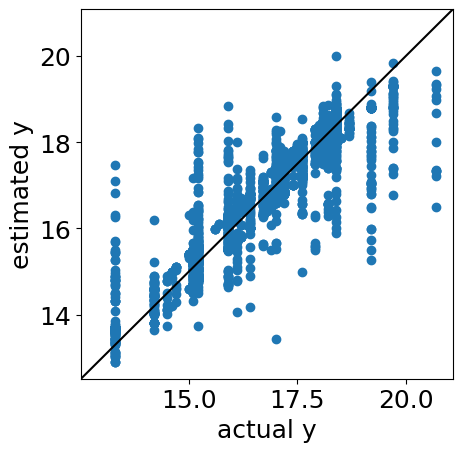

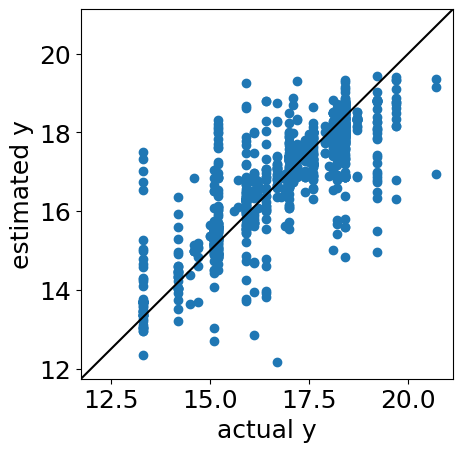

R2 : 訓練 0.859222430495595, 検証 0.704512435688472
MAE : 訓練 0.41130763443275536, 検証 0.5604074501732303
RMSE : 訓練 0.5968047634064427, 検証 0.8520362914413302


In [9]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit.csv', index_col=0)
x=dataset.iloc[:, :114]
y=dataset.iloc[:, 122]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

# SVM(nonlinear)の実行
from sklearn.svm import SVR
import numpy as np
nonlinear_svr_cs=2**np.arange(-5, 11, 1.0)
nonlinear_svr_gammas=2**np.arange(-10, 1, 1.0)
nonlinear_svr_epsilons=2**np.arange(-20, 11, 1.0)
# gammaの最適化
from scipy.spatial.distance import cdist
square_of_euclidean_distance = cdist(autoscaled_x_train, autoscaled_x_train, metric='sqeuclidean')
variance_of_gram_matrix = []
for nonlinear_svr_gamma in nonlinear_svr_gammas:
    gram_matrix = np.exp(- nonlinear_svr_gamma * square_of_euclidean_distance)
    variance_of_gram_matrix.append(gram_matrix.var(ddof=1))
optimal_nonlinear_svr_gamma = nonlinear_svr_gammas[variance_of_gram_matrix.index(max(variance_of_gram_matrix))]
# クロスバリデーションの設定
from sklearn.model_selection import KFold
fold = KFold(n_splits=5, shuffle=True, random_state=9)
from sklearn.model_selection import GridSearchCV
# epsilonの最適化
model_for_cross_validation=SVR(kernel='rbf', C=3, gamma=optimal_nonlinear_svr_gamma)
gs_cv=GridSearchCV(model_for_cross_validation, {'epsilon':nonlinear_svr_epsilons}, cv=fold)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_nonlinear_svr_epsilon=gs_cv.best_params_['epsilon']
# Cの最適化
model_for_cross_validation=SVR(kernel='rbf', epsilon=optimal_nonlinear_svr_epsilon, gamma=optimal_nonlinear_svr_gamma)
gs_cv=GridSearchCV(model_for_cross_validation, {'C':nonlinear_svr_cs}, cv=fold)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_nonlinear_svr_c=gs_cv.best_params_['C']
# gammaの最適化
model_for_cross_validation=SVR(kernel='rbf', epsilon=optimal_nonlinear_svr_epsilon, C=optimal_nonlinear_svr_c)
gs_cv=GridSearchCV(model_for_cross_validation, {'gamma':nonlinear_svr_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, autoscaled_y_train)
optimal_nonlinear_svr_gamma=gs_cv.best_params_['gamma']

print(f"最適なC: {optimal_nonlinear_svr_c}")
print(f"最適なgamma: {optimal_nonlinear_svr_gamma}")
print(f"最適なepsilon: {optimal_nonlinear_svr_epsilon}")

model=SVR(kernel='rbf',C=optimal_nonlinear_svr_c, gamma=optimal_nonlinear_svr_gamma, epsilon=optimal_nonlinear_svr_epsilon)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE : 訓練 {RMSE_train}, 検証 {RMSE_test}")

# RR

最適なlambda: 2.0


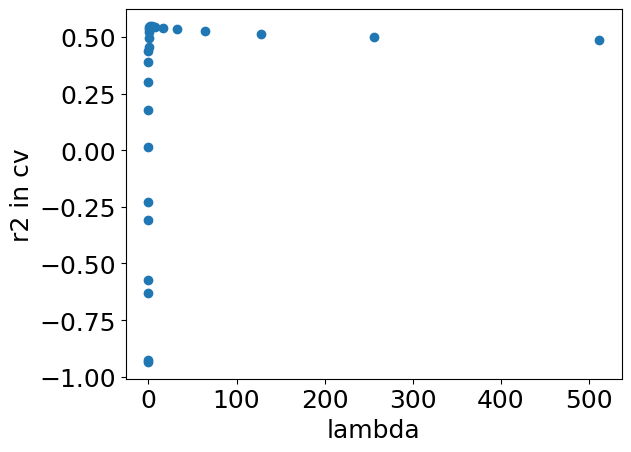

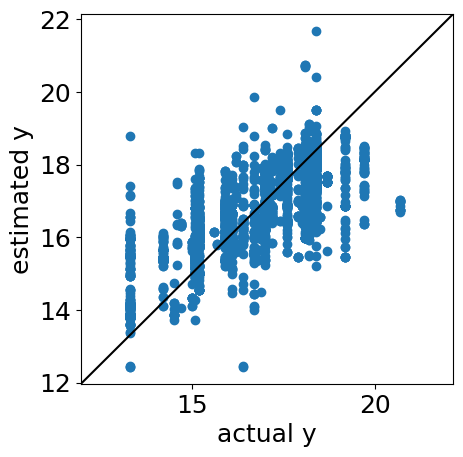

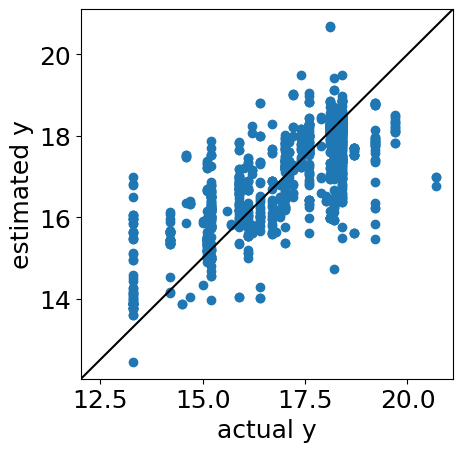

R2 : 訓練 0.5839684964440984, 検証 0.5772172075546409
MAE : 訓練 0.7486981391436487, 検証 0.7442393892480077
RMSE) : 訓練 1.0259558177858898, 検証 1.0191711953177263


,標準回帰係数
Al / Si,-0.015879
Na / Si,-0.008671
K / Si,0.398304
F / Si,-0.079496
H2O / Si,0.069235
...,...
fr_Ndealkylation2,-0.055837
fr_bicyclic,0.038697
fr_piperdine,-0.014650
fr_quatN,0.283898


In [10]:
# 前処理
import pandas as pd
dataset=pd.read_csv('dataset_rdkit.csv', index_col=0)
x=dataset.iloc[:, :114]
y=dataset.iloc[:, 122]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, random_state=4)
autoscaled_x_train=(x_train-x_train.mean())/x_train.std()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
autoscaled_y_train=(y_train-y_train.mean())/y_train.std()
autoscaled_y_test=(y_test-y_train.mean())/y_train.std()

## RRの実行
from sklearn.linear_model import Ridge
import numpy as np
ridge_lambdas=2**np.arange(-15, 10, 1.0)
from sklearn.model_selection import cross_val_predict
r2_in_cv_all=[]
all_lambdas=[]
from sklearn import metrics
for ridge_lambda in ridge_lambdas:
    model=Ridge(alpha=ridge_lambda)
    estimated_y_in_cv=pd.DataFrame(cross_val_predict(model, autoscaled_x_train, autoscaled_y_train, cv=5))
    estimated_y_in_cv=estimated_y_in_cv*y_train.std()+y_train.mean()
    r2_in_cv=metrics.r2_score(y_train, estimated_y_in_cv)
    r2_in_cv_all.append(r2_in_cv)
    all_lambdas.append(ridge_lambda)

optimal_ridge_lambda=ridge_lambdas[r2_in_cv_all.index(max(r2_in_cv_all))]
print(f"最適なlambda: {optimal_ridge_lambda}")

import matplotlib.pyplot as plt
plt.scatter(all_lambdas, r2_in_cv_all)
plt.xlabel('lambda')
plt.ylabel('r2 in cv')
plt.show()

model=Ridge(alpha=optimal_ridge_lambda)
model.fit(autoscaled_x_train, autoscaled_y_train)

# FDの予測
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_train=estimated_y_train*y_train.std()+y_train.mean()
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
estimated_y_test=estimated_y_test*y_train.std()+y_train.mean()

import matplotlib.pyplot as plt
import matplotlib.figure as figure

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_train, estimated_y_train.iloc[:, 0]) 
y_max = max(y_train.max(), estimated_y_train.iloc[:, 0].max()) 
y_min = min(y_train.min(), estimated_y_train.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

plt.rcParams['font.size'] = 18 
plt.figure(figsize=figure.figaspect(1)) 
plt.scatter(y_test, estimated_y_test.iloc[:, 0]) 
y_max = max(y_test.max(), estimated_y_test.iloc[:, 0].max()) 
y_min = min(y_test.min(), estimated_y_test.iloc[:, 0].min()) 
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-') 
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)) 
plt.xlabel("actual y") 
plt.ylabel("estimated y") 
plt.show() 

from sklearn import metrics
r2_train=metrics.r2_score(y_train, estimated_y_train)
r2_test=metrics.r2_score(y_test, estimated_y_test)
MAE_train=metrics.mean_absolute_error(y_train, estimated_y_train)
MAE_test=metrics.mean_absolute_error(y_test, estimated_y_test)
RMSE_train=metrics.root_mean_squared_error(y_train, estimated_y_train)
RMSE_test=metrics.root_mean_squared_error(y_test, estimated_y_test)

print(f"R2 : 訓練 {r2_train}, 検証 {r2_test}")
print(f"MAE : 訓練 {MAE_train}, 検証 {MAE_test}")
print(f"RMSE) : 訓練 {RMSE_train}, 検証 {RMSE_test}")

標準回帰係数_rr = pd.DataFrame((model.coef_), index=x.columns, columns=['標準回帰係数'])
display(標準回帰係数_rr)
                      
標準回帰係数_rr.to_csv('標準回帰係数_rr_rdkit.csv')